# 単回帰分析
傾き$a$の計算式
$$
a = \dfrac{\displaystyle{\sum_{n=1}^{N}}x_{n}y_{n}}
{\displaystyle{\sum_{n=1}^{N}}x_{n}^{2}}
$$

# Numpy:数値計算

In [1]:
import numpy as np

In [2]:
#ベクトルの定義
x = np.array([1,2,3])

In [3]:
x

array([1, 2, 3])

In [4]:
y = np.array([2,3.9,6.1])

In [5]:
y

array([2. , 3.9, 6.1])

# データの中心化

In [6]:
# 平均の算出
x.mean()

2.0

In [7]:
y.mean()

4.0

In [8]:
# 中心化
xc = x - x.mean()

In [9]:
xc

array([-1.,  0.,  1.])

In [10]:
yc = y- y.mean()

In [11]:
yc

array([-2. , -0.1,  2.1])

# パラメータaの計算

In [12]:
# 要素ごとの掛け算（要素積）
xx = xc * xc

In [13]:
xx

array([1., 0., 1.])

In [14]:
xy = xc * yc

In [15]:
xy

array([ 2. , -0. ,  2.1])

In [16]:
xx.sum()

2.0

In [17]:
xy.sum()

4.1

In [18]:
a = xy.sum() / xx.sum()

In [19]:
a

2.05

# Pandas:データベースの操作

In [20]:
import pandas as pd

In [21]:
# CSVファイルの読み込み
# df: data frame
df = pd.read_csv('sample.csv')

In [24]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [27]:
# データの抽出
x = df['x']
y = df['y']

# Matplotlib:グラフの描画

In [34]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

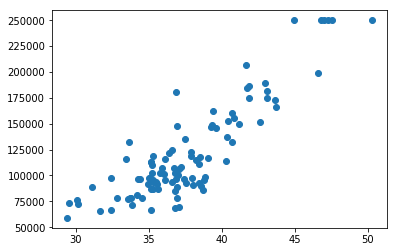

In [35]:
# 横軸をx、縦軸をyの散布図（scatter）をプロット
plt.scatter(x,y)
plt.show

# 単回帰分析の実装

## データの中心化

In [36]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [37]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [40]:
# 中心化
df_c = df - df.mean()

In [41]:
df_c.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [42]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.989520e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [44]:
# データの抽出
x = df_c['x']
y = df_c['y']

<function matplotlib.pyplot.show(*args, **kw)>

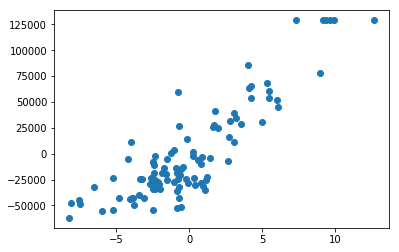

In [45]:
# xとyの散布図をプロット
plt.scatter(x,y)
plt.show

## パラメータaの計算
傾き$a$の計算式
$$
a = \dfrac{\displaystyle{\sum_{n=1}^{N}}x_{n}y_{n}}
{\displaystyle{\sum_{n=1}^{N}}x_{n}^{2}}
$$

In [46]:
xx = x * x # *は要素積
xy = x * y

In [47]:
a = xy.sum()/xx.sum()

In [48]:
a

10069.022519284063

## プロットして確認
$$
\hat{y} = ax
$$

<function matplotlib.pyplot.show(*args, **kw)>

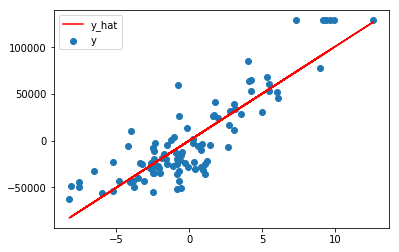

In [53]:
plt.scatter(x,y,label='y') # 実測値
plt.plot(x,a*x,label='y_hat',color='red') # 予測値
plt.legend() # 凡例の表示
plt.show

## 予測値の計算
$$
\begin{align}
y-{\bar y}&=a(x-{\bar x})\\
\rightarrow y &= a(x-{\bar x})+{\bar y}
\end{align}
$$

In [54]:
x_new = 40 # 40平米の部屋

In [56]:
mean = df.mean()

In [57]:
mean['x']

37.62222

In [58]:
# 中心化
xc = x_new - mean['x']

In [59]:
xc

2.3777800000000013

In [61]:
# 単回帰分析による予測
yc = a * xc

In [62]:
# 元のスケールの予測値
y_hat = a * xc + mean['y']

In [63]:
y_hat

145006.92036590326

## 予測値を計算する関数の作成

In [68]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.0
    # 中心化
    xc = x - xm
    # 予測値の計算
    y_hat = a * xc + ym
    #出力
    return y_hat

In [71]:
# 予測値
predict(40)

145006.92036590326

In [72]:
predict(30)

44316.695173062646